In [1]:
# Install required libraries
!pip install scikit-learn matplotlib seaborn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Generate three different datasets
n_samples = 300

# Dataset 1: Moons (non-linear separable)
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Dataset 2: Circles (concentric)
X_circles, y_circles = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)

# Dataset 3: Blobs with noise
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=3, n_features=2,
                              cluster_std=0.5, random_state=42)
# Add noise points
noise = np.random.uniform(low=X_blobs.min(axis=0), high=X_blobs.max(axis=0), size=(30, 2))
X_blobs = np.vstack([X_blobs, noise])
y_blobs = np.hstack([y_blobs, np.full(30, -1)])  # -1 for noise

datasets = [
    ('Moons', X_moons, y_moons),
    ('Circles', X_circles, y_circles),
    ('Blobs with Noise', X_blobs, y_blobs)
]

print("Generated 3 different datasets for testing DBSCAN")
print(f"Each dataset has {n_samples} points (blobs has 30 extra noise points)")

Generated 3 different datasets for testing DBSCAN
Each dataset has 300 points (blobs has 30 extra noise points)


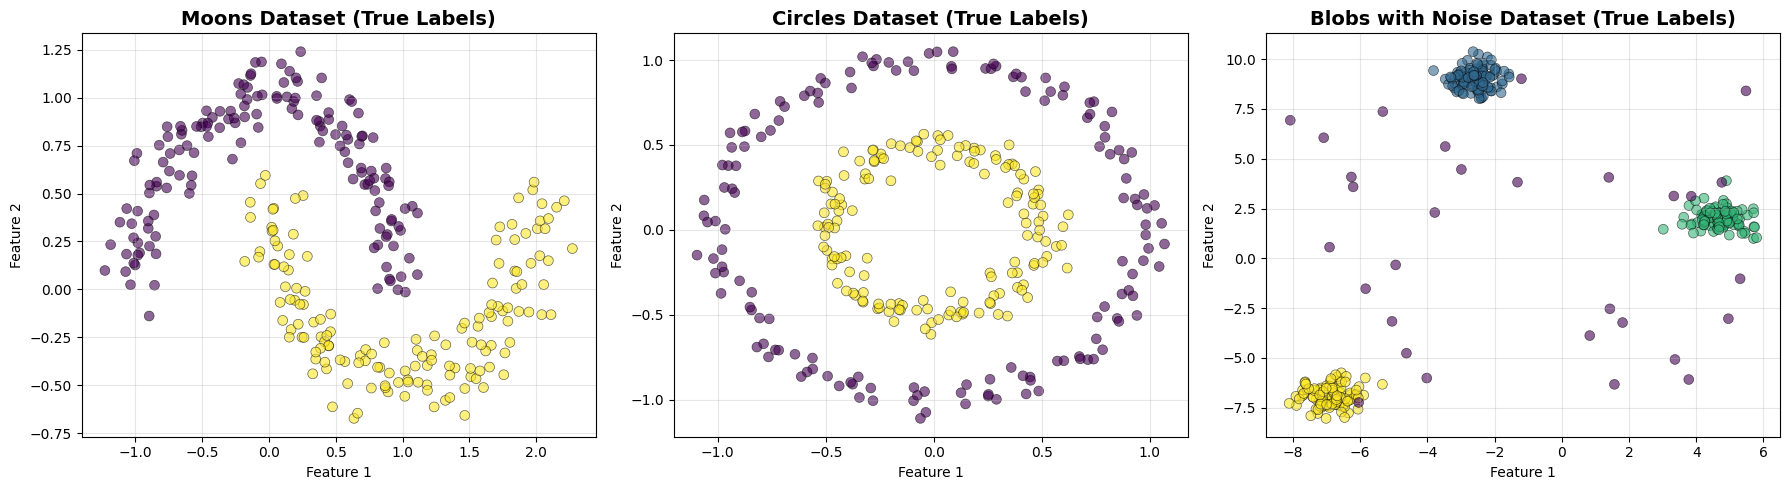

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, X, y) in enumerate(datasets):
    axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    axes[idx].set_title(f'{name} Dataset (True Labels)', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# Standardize the data
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Apply DBSCAN
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X_moons_scaled)

# Count clusters and noise
n_clusters = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise = list(labels_moons).count(-1)

print(f"DBSCAN on Moons Dataset:")
print(f"  eps=0.3, min_samples=5")
print(f"  Clusters found: {n_clusters}")
print(f"  Noise points: {n_noise}")
print(f"  Cluster distribution: {np.bincount(labels_moons + 1)}")

DBSCAN on Moons Dataset:
  eps=0.3, min_samples=5
  Clusters found: 2
  Noise points: 2
  Cluster distribution: [  2 149 149]


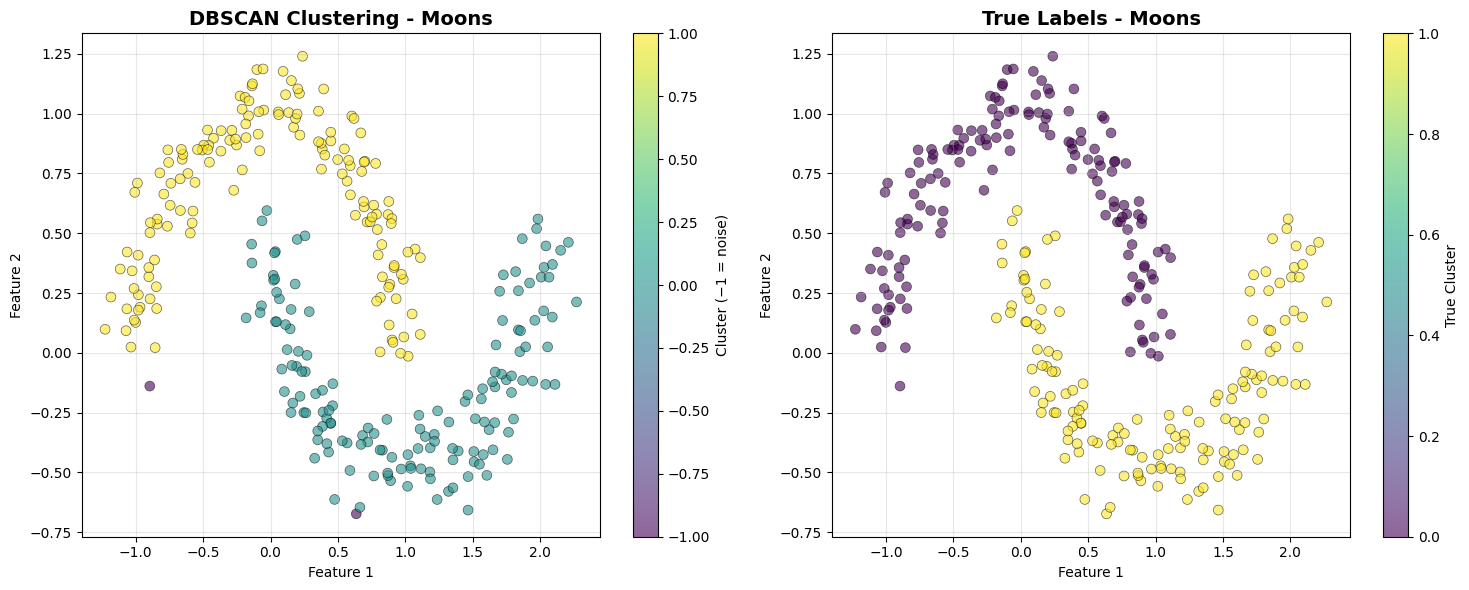

In [5]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# DBSCAN results
scatter1 = axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons,
                          cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_title('DBSCAN Clustering - Moons', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster (−1 = noise)')

# True labels
scatter2 = axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons,
                          cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_title('True Labels - Moons', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='True Cluster')

plt.tight_layout()
plt.show()

In [6]:
# Standardize
X_circles_scaled = scaler.fit_transform(X_circles)

# Apply DBSCAN with tuned parameters for circles
dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X_circles_scaled)

n_clusters = len(set(labels_circles)) - (1 if -1 in labels_circles else 0)
n_noise = list(labels_circles).count(-1)

print(f"\nDBSCAN on Circles Dataset:")
print(f"  eps=0.2, min_samples=5")
print(f"  Clusters found: {n_clusters}")
print(f"  Noise points: {n_noise}")
print(f"  Cluster distribution: {np.bincount(labels_circles + 1)}")


DBSCAN on Circles Dataset:
  eps=0.2, min_samples=5
  Clusters found: 18
  Noise points: 29
  Cluster distribution: [ 29 149   6  11  10   8   6  10   4   8   6   7   7  12   6   5   7   5
   4]


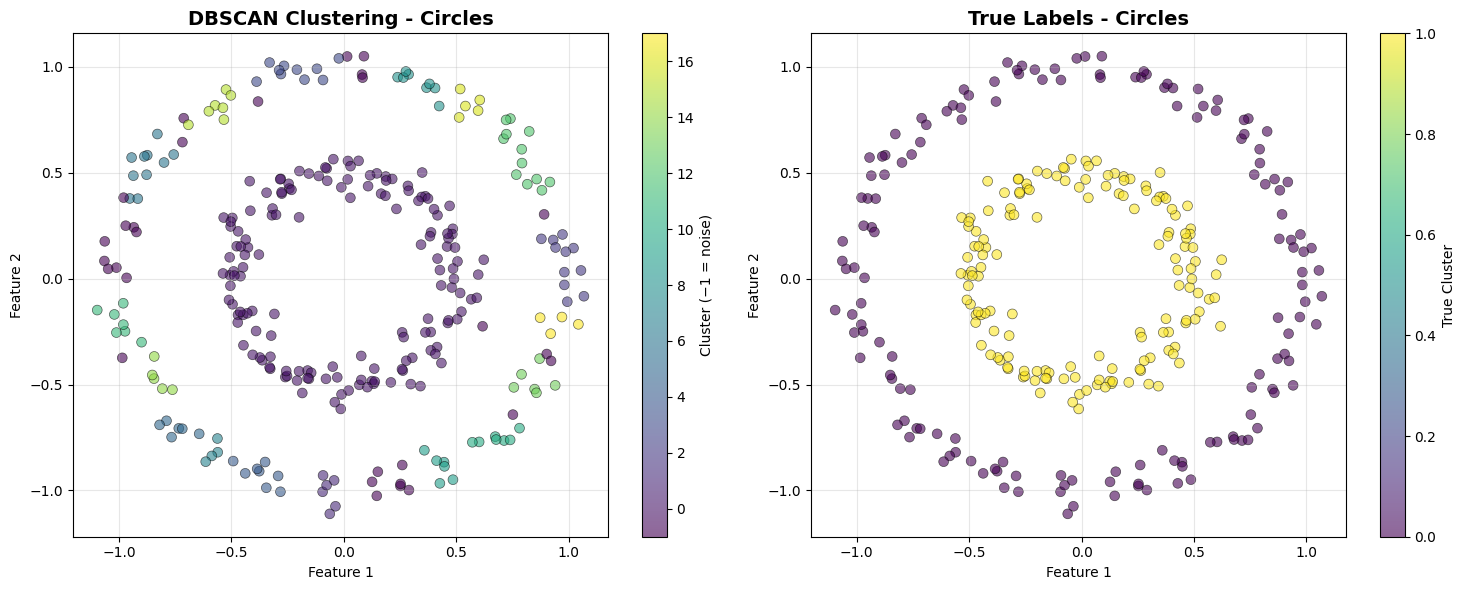

In [7]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles,
                          cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_title('DBSCAN Clustering - Circles', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster (−1 = noise)')

scatter2 = axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles,
                          cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_title('True Labels - Circles', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='True Cluster')

plt.tight_layout()
plt.show()

In [8]:
# Standardize
X_blobs_scaled = scaler.fit_transform(X_blobs)

# Apply DBSCAN
dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)
labels_blobs = dbscan_blobs.fit_predict(X_blobs_scaled)

n_clusters = len(set(labels_blobs)) - (1 if -1 in labels_blobs else 0)
n_noise = list(labels_blobs).count(-1)

print(f"\nDBSCAN on Blobs with Noise:")
print(f"  eps=0.3, min_samples=5")
print(f"  Clusters found: {n_clusters}")
print(f"  Noise points detected: {n_noise}")
print(f"  Cluster distribution: {np.bincount(labels_blobs + 1)}")


DBSCAN on Blobs with Noise:
  eps=0.3, min_samples=5
  Clusters found: 3
  Noise points detected: 23
  Cluster distribution: [ 23 103 101 103]


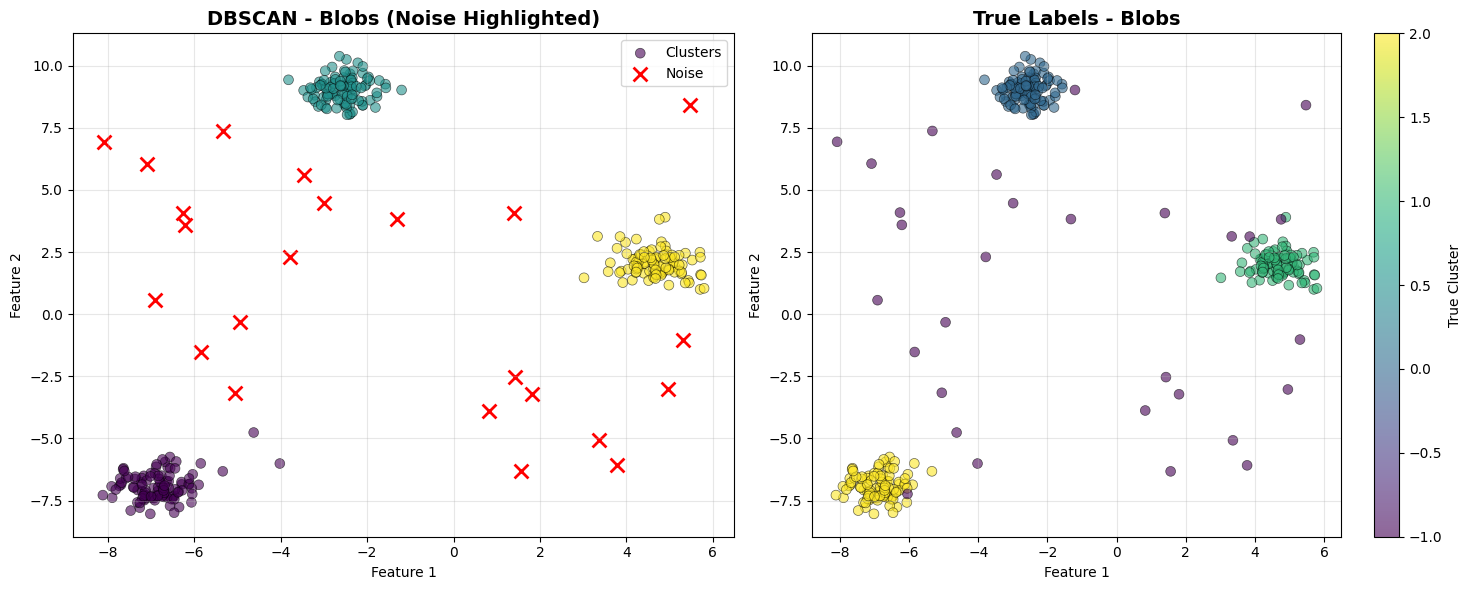

In [9]:
# Visualize with noise highlighted
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# DBSCAN results with noise highlighted
noise_mask = labels_blobs == -1
axes[0].scatter(X_blobs[~noise_mask, 0], X_blobs[~noise_mask, 1],
               c=labels_blobs[~noise_mask], cmap='viridis',
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5, label='Clusters')
axes[0].scatter(X_blobs[noise_mask, 0], X_blobs[noise_mask, 1],
               c='red', marker='x', s=100, linewidths=2, label='Noise')
axes[0].set_title('DBSCAN - Blobs (Noise Highlighted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# True labels
scatter2 = axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs,
                          cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_title('True Labels - Blobs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='True Cluster')

plt.tight_layout()
plt.show()

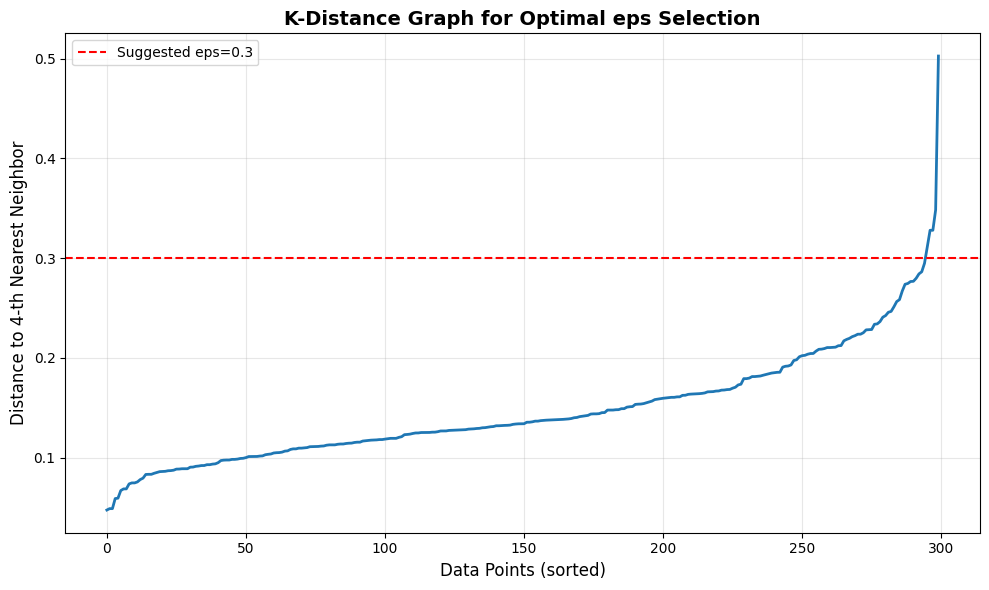

The 'elbow' in the k-distance graph suggests a good eps value
Points after the elbow are likely outliers


In [10]:
# K-distance graph to find optimal eps
k = 4  # min_samples parameter
nbrs = NearestNeighbors(n_neighbors=k).fit(X_moons_scaled)
distances, indices = nbrs.kneighbors(X_moons_scaled)

# Sort distances to k-th nearest neighbor
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances, linewidth=2)
plt.xlabel('Data Points (sorted)', fontsize=12)
plt.ylabel(f'Distance to {k}-th Nearest Neighbor', fontsize=12)
plt.title('K-Distance Graph for Optimal eps Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.3, color='r', linestyle='--', label='Suggested eps=0.3')
plt.legend()
plt.tight_layout()
plt.show()

print("The 'elbow' in the k-distance graph suggests a good eps value")
print("Points after the elbow are likely outliers")

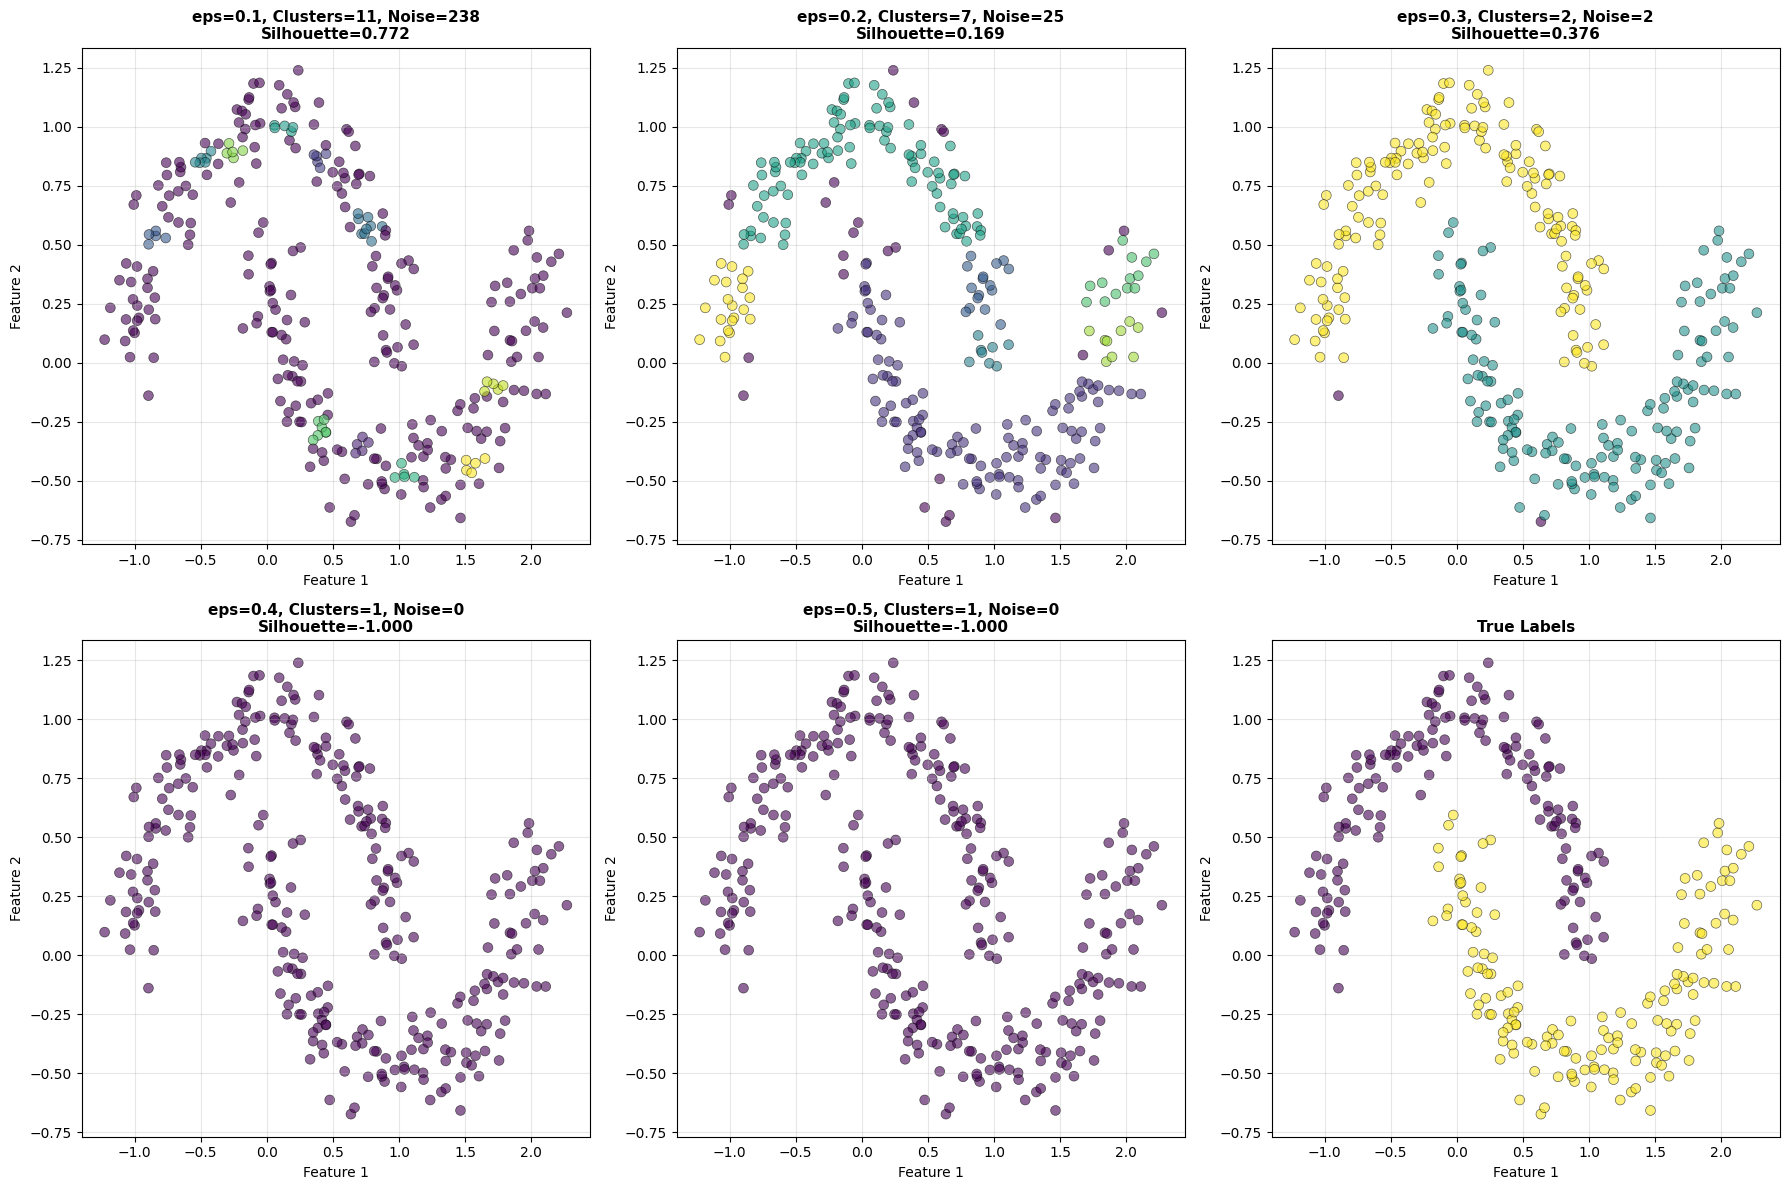

In [11]:
# Test different eps values
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_val = 5

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
    labels = dbscan.fit_predict(X_moons_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Calculate silhouette score (only if we have valid clusters)
    if n_clusters > 1 and n_noise < len(labels) - 1:
        valid_mask = labels != -1
        if len(np.unique(labels[valid_mask])) > 1:
            sil_score = silhouette_score(X_moons_scaled[valid_mask], labels[valid_mask])
        else:
            sil_score = -1
    else:
        sil_score = -1

    # Plot
    scatter = axes[idx].scatter(X_moons[:, 0], X_moons[:, 1], c=labels,
                               cmap='viridis', alpha=0.6, s=50,
                               edgecolors='black', linewidth=0.5)
    axes[idx].set_title(f'eps={eps}, Clusters={n_clusters}, Noise={n_noise}\nSilhouette={sil_score:.3f}',
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

# Plot true labels in last subplot
axes[5].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons,
               cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[5].set_title('True Labels', fontsize=11, fontweight='bold')
axes[5].set_xlabel('Feature 1')
axes[5].set_ylabel('Feature 2')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Calculate metrics for all three datasets
results_summary = []

dataset_labels = [
    ('Moons', labels_moons, y_moons),
    ('Circles', labels_circles, y_circles),
    ('Blobs', labels_blobs, y_blobs[:len(labels_blobs)])
]

for name, pred_labels, true_labels in dataset_labels:
    # Only calculate metrics on non-noise points
    valid_mask = pred_labels != -1

    if np.sum(valid_mask) > 0 and len(np.unique(pred_labels[valid_mask])) > 1:
        ari = adjusted_rand_score(true_labels[valid_mask], pred_labels[valid_mask])
        ami = adjusted_mutual_info_score(true_labels[valid_mask], pred_labels[valid_mask])
    else:
        ari = ami = -1

    n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
    n_noise = list(pred_labels).count(-1)

    results_summary.append({
        'Dataset': name,
        'Clusters Found': n_clusters,
        'Noise Points': n_noise,
        'Adjusted Rand Index': ari,
        'Adjusted Mutual Info': ami
    })

results_df = pd.DataFrame(results_summary)
print("\nDBSCAN Clustering Results Summary:")
print("="*80)
print(results_df.to_string(index=False))
print("\nNote: Metrics calculated only on non-noise points")
print("Higher ARI and AMI scores indicate better agreement with true labels")


DBSCAN Clustering Results Summary:
Dataset  Clusters Found  Noise Points  Adjusted Rand Index  Adjusted Mutual Info
  Moons               2             2             1.000000              1.000000
Circles              18            29             0.620460              0.510458
  Blobs               3            23             0.965252              0.942687

Note: Metrics calculated only on non-noise points
Higher ARI and AMI scores indicate better agreement with true labels
